<a href="https://colab.research.google.com/github/utopian18/ML_in_Textile/blob/main/log_transformation_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading the basic packages
import numpy as np
import pandas as pd

In [ ]:
#this data is already cleaned and we will do some processing
df = pd.read_csv('textile_rejection_prediction.csv')

In [ ]:
df.head()

,Sl,lot_no.,warp_count,weft_count,epi,ppi,remark,F.Ord.(Yds),Delivery,Req. Grey Qtv (Yds),Shrin%,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,1,12207,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,2,12213,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,3,12313,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,4,12315,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0,14.011231
4,5,12317,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


It seems the dataset has a lot of unnecessay columns, such as: lot no., required grey quantity, delivered yds, rejection yards and so on. we will make a list of some essential parameters and add some features by feature engineering

In [ ]:
df.shape

(409, 18)

In [ ]:
#rename some feature's name to make it more pythonic
df= df.rename(columns= {'Delivery': 'Allowance', 'remark':'beam_type', 'F.Ord.(Yds)':'Finish_order_yds', 'Shrin%': 'shrinkage' })

In [ ]:
df.head()

,Sl,lot_no.,warp_count,weft_count,epi,ppi,beam_type,Finish_order_yds,Allowance,Req. Grey Qtv (Yds),shrinkage,Req. Beam L(yds),Recv. Beam L(Yds),Deliverd Yds,Rej.Yds,Total Prod Yds,Short/Ex. Yds,Total loss%
0,1,12207,40,40,110,80,double beam,31300,6.000360,33298,12.500542,38055.0928,38286.9360,34668,301.0,34969.0,1671.0,8.665974
1,2,12213,40,40,110,90,normal,54600,6.998927,58709,14.500689,68666.0504,69634.9800,59019,505.0,59524.0,815.0,14.519973
2,3,12313,40,40,110,90,normal,64715,6.999971,69586,14.499654,81386.8056,82556.9576,70613,341.0,70954.0,1368.0,14.054488
3,4,12315,40,40,110,90,normal,25500,6.998796,27419,14.502171,32069.8200,32353.0624,27820,0.0,27820.0,401.0,14.011231
4,5,12317,50,50,140,70,normal,20700,8.000000,22500,8.999734,24725.2024,24917.6760,22631,369.0,23000.0,500.0,7.696047


In [ ]:
df['Grey_Fabric_yds']= (df['Finish_order_yds']*100)/(100-df['Allowance'])
df['Req_Beam_length_yds']= (df['Grey_Fabric_yds']*100)/(100-df['shrinkage'])

In [ ]:
use_cols = ['warp_count', 'weft_count', 'epi', 'ppi', 'beam_type', 'Finish_order_yds', 'Deliverd Yds', 'shrinkage','Total loss%']

In [ ]:
data = df[use_cols]

**Exploratory Data Analysis**

In [ ]:
data.describe()

,warp_count,weft_count,epi,ppi,Finish_order_yds,Deliverd Yds,shrinkage,Total loss%
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,40.709046,40.880196,118.828851,80.606357,6928.193154,7417.909535,12.939112,12.795277
std,6.319588,6.874778,14.638790,8.958732,14015.522773,15060.748940,3.860298,4.089565
min,20.000000,20.000000,30.000000,44.000000,250.000000,316.000000,1.483345,-8.469815
25%,40.000000,40.000000,110.000000,80.000000,1450.000000,1621.000000,10.519508,11.068249
50%,40.000000,40.000000,120.000000,80.000000,2900.000000,3130.000000,12.754421,13.242584
75%,40.000000,40.000000,130.000000,90.000000,6065.000000,6513.000000,14.445031,14.429823
max,80.000000,80.000000,160.000000,106.000000,172800.000000,185515.000000,66.165261,65.477430


**Lets plot all histograms of the numerical columns**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
data.shape

(409, 9)

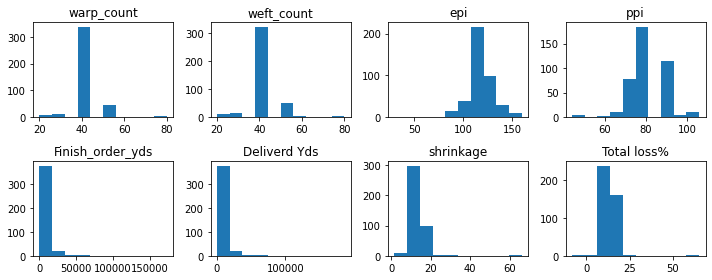

In [ ]:
figs, axs = plt.subplots(nrows=2,ncols=4, figsize=(10,4))
for i, (col, ax) in enumerate(zip(data.select_dtypes(exclude='object').columns, axs.flatten())):
  ax.hist(data[col])
  ax.set_title(col)
plt.tight_layout()

**Removing outliers**

In [ ]:
q1= data['Total loss%'].quantile(0.1)
q4 = data['Total loss%'].quantile(0.99)

In [ ]:
data2= data[data['Total loss%']>q1]

In [ ]:
df = data2[data2['Total loss%']<q4]

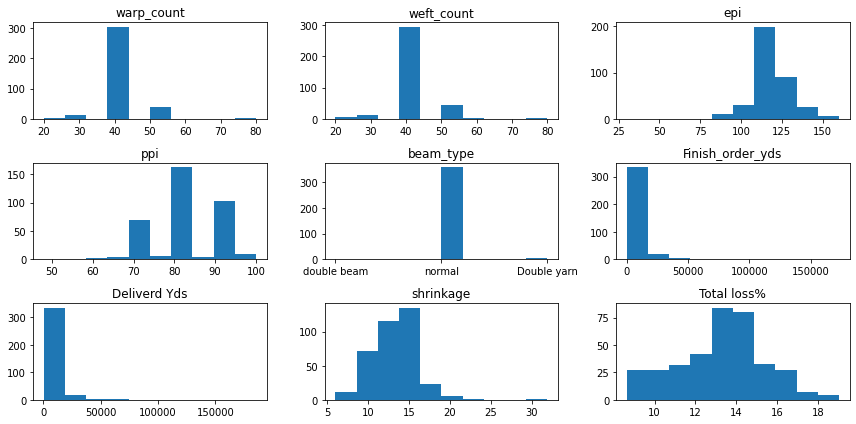

In [ ]:
figs, axs = plt.subplots(ncols=3, nrows=3, figsize=(12,6))
for i, (col, ax) in enumerate(zip(df.columns, axs.flatten())):
  ax.hist(df[col])
  ax.set_title(col)
plt.tight_layout()

In [ ]:
import seaborn as sns

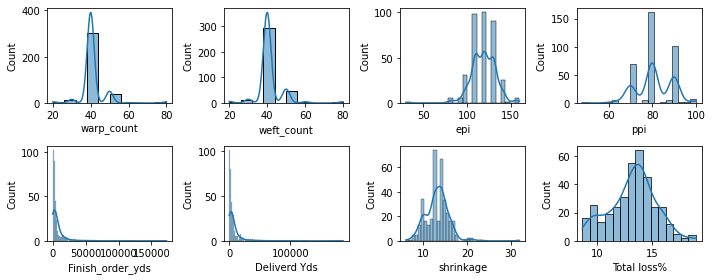

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,4))
for i, (col, ax) in enumerate(zip(df.select_dtypes(exclude='object').columns, axes.flatten())):
  sns.histplot(df[col], kde= True, ax= ax)
plt.tight_layout()

In [ ]:
df['log_finish_order_yds'] = np.log(df['Finish_order_yds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'After log transformation')

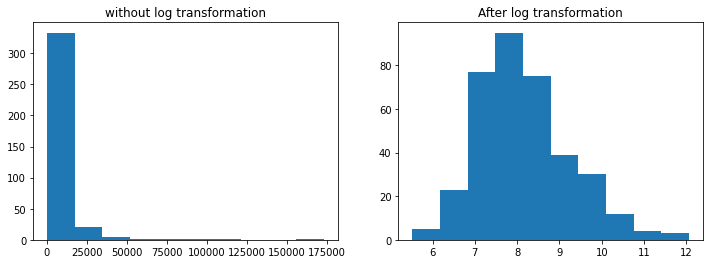

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(df['Finish_order_yds']);
axes[0].set_title('without log transformation')
axes[1].hist(df['log_finish_order_yds']);
axes[1].set_title('After log transformation')


In [ ]:
df['log_delivered_yds']= np.log(df['Deliverd Yds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'log_delivered_yds')

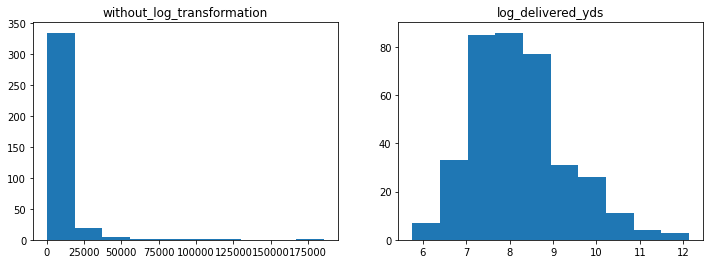

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(df['Deliverd Yds'])
axes[0].set_title('without_log_transformation')
axes[1].hist(df['log_delivered_yds'])
axes[1].set_title('log_delivered_yds')


In [ ]:
df.shape

(363, 11)

**All the historgrams after log_transformation**

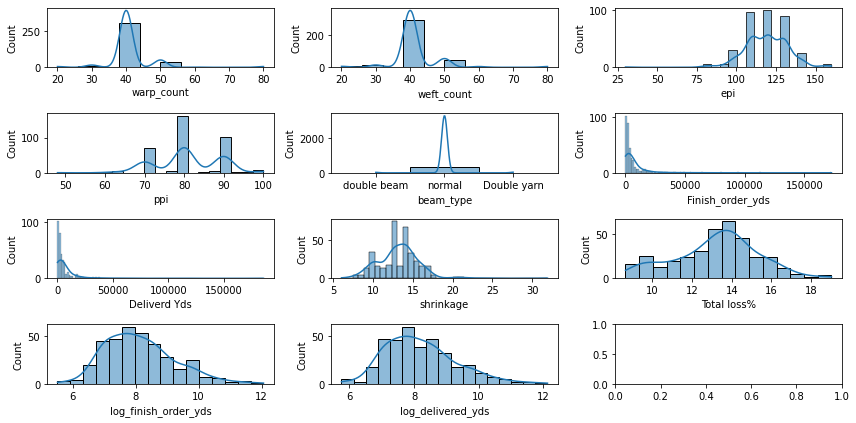

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(12,6))
for col, ax in zip(df.columns, axes.flatten()):
  sns.histplot(df[col], ax=ax, kde=True)
plt.tight_layout()

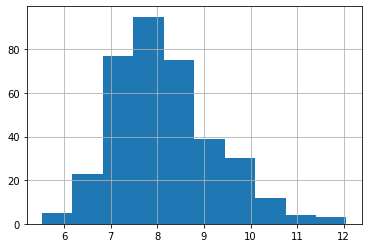

In [ ]:
df['log_finish_order_yds'].hist()

In [ ]:
# df.to_csv('ANN_for_textile_no_outliers.csv')

In [ ]:
# df['log_ppi']= np.log(df['ppi'])

In [ ]:
# df['log_ppi'].hist()

In [ ]:
df.to_csv('log_transformed_data.csv', index= False)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.copy()
y= X.pop('Total loss%')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

**XGB implement**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

[05:16:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(y_test, y_pred)

0.44755333127848596

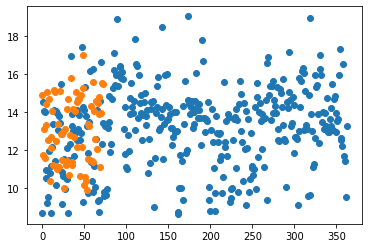

In [ ]:
plt.scatter(x= range(0, df.shape[0]), y= y )
plt.scatter(x=range(0,len(y_pred)), y= y_pred)

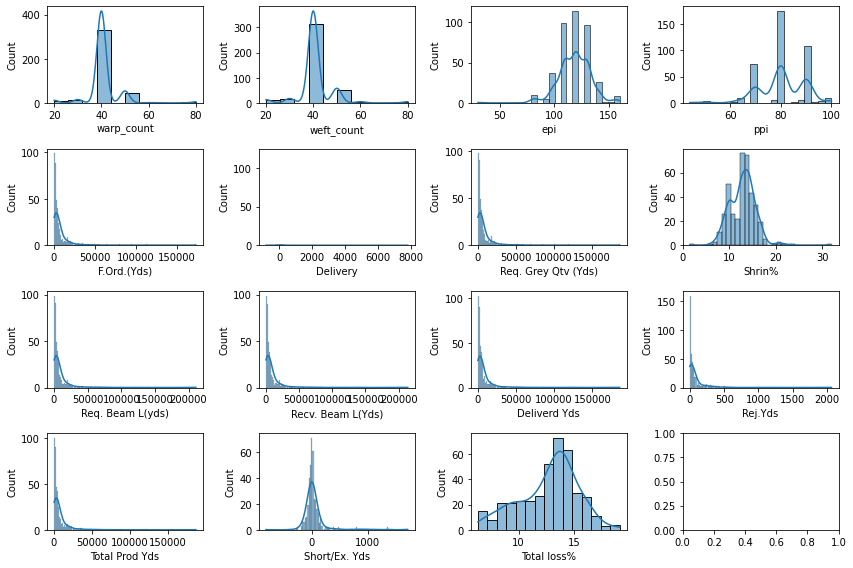

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,8))
for i, (col, ax) in enumerate(zip(df2.select_dtypes(exclude='object').columns[2:], axes.flatten())):
  sns.histplot(df2[col], kde= True, ax= ax)
plt.tight_layout()

In [ ]:
df2.loc[:,'log_F_ords']= np.log1p(df2['F.Ord.(Yds)'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


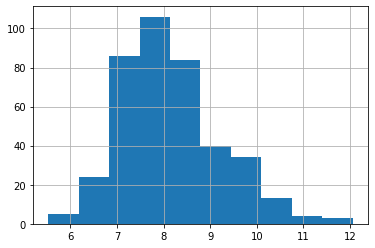

In [ ]:
df2['log_F_ords'].hist()


**Adding features**

In [ ]:
dependent_vars = ['warp_count', 'weft_count', 'epi', 'ppi', 'remark', 'F.Ord.(Yds)', 'Delivery', 'Shrin%']
independent_var = ['Total loss%']

In [ ]:
X = df[dependent_vars]
#rename some feature's name to make it more pythonic
X= X.rename(columns= {'Delivery': 'Allowance', 'remark':'beam_type', 'F.Ord.(Yds)':'Finish_order_yds', 'Shrin%': 'shrinkage' })
y = df[independent_var]

In [ ]:
X.head()

,warp_count,weft_count,epi,ppi,beam_type,Finish_order_yds,Allowance,shrinkage
0,40,40,110,80,double beam,31300,6.000360,12.500542
1,40,40,110,90,normal,54600,6.998927,14.500689
2,40,40,110,90,normal,64715,6.999971,14.499654
3,40,40,110,90,normal,25500,6.998796,14.502171
4,50,50,140,70,normal,20700,8.000000,8.999734


Now we will add 2 features required grey fabrics and required beam length. the formulla for this is ${grey\space fabric \space required} = \frac {Req \space Finish \space Fabrics\times 100}{100 - warp\space allowance% ) }$

In [ ]:
X['Grey_Fabric_yds']= (X['Finish_order_yds']*100)/(100-X['Allowance'])
X['Req_Beam_length_yds']= (X['Grey_Fabric_yds']*100)/(100-X['shrinkage'])

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   warp_count           409 non-null    int64  
 1   weft_count           409 non-null    int64  
 2   epi                  409 non-null    int64  
 3   ppi                  409 non-null    int64  
 4   beam_type            409 non-null    object 
 5   Finish_order_yds     409 non-null    int64  
 6   Allowance            409 non-null    float64
 7   shrinkage            409 non-null    float64
 8   Grey_Fabric_yds      409 non-null    float64
 9   Req_Beam_length_yds  409 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 32.1+ KB


**XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
X_train['beam_type'] = le.fit_transform(X_train['beam_type'])
X_test['beam_type'] = le.transform(X_test['beam_type'])

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

[03:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred, y_test)

0.3233272853090329

In [ ]:
error_df = pd.DataFrame()

In [ ]:
error_df['actual'] = y_test
error_df['prediction'] = y_pred
error_df['error'] = error_df['actual']- error_df['prediction']

In [ ]:
error_df.describe()

,actual,prediction,error
count,82.000000,82.000000,82.000000
mean,12.728766,12.839214,-0.110449
std,2.729427,2.322004,1.906847
min,6.403242,7.453018,-3.596711
25%,11.181758,10.932714,-1.192538
50%,13.460237,13.411165,-0.239931
75%,14.519367,14.658559,0.702304
max,18.465009,17.173367,6.864818


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

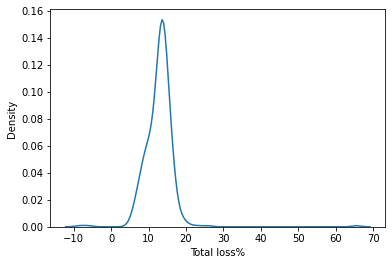

In [ ]:
sns.kdeplot(df['Total loss%'])

In [ ]:
max_limit = np.quantile(y, q=0.99)

In [ ]:
min_limit= np.quantile(y, q=0.01)

In [ ]:
df_no_out['Total loss%'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            398, 399, 400, 401, 402, 404, 405, 406, 407, 408],
           dtype='int64', length=399)

In [ ]:
df.index

RangeIndex(start=0, stop=409, step=1)

In [ ]:
from scipy.stats import 

In [ ]:
df.clip(max_limit, min_limit)

TypeError: ignored

In [ ]:
y_no_out.shape

(409,)

In [ ]:
df.shape

(409, 18)

In [ ]:
df_no_max = df[df['Total loss%']<max_limit]

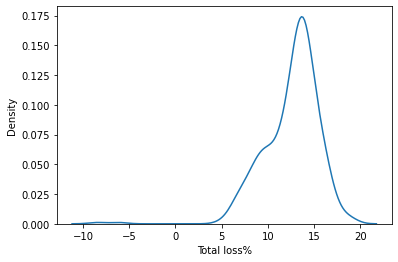

In [ ]:
sns.kdeplot(df_no_max['Total loss%'])

In [ ]:
df_no_out = df_no_max[df_no_max['Total loss%']>min_limit]

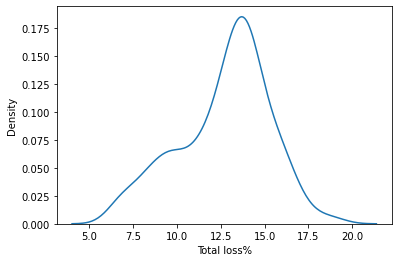

In [ ]:
sns.kdeplot(df_no_out['Total loss%'])

In [ ]:
# y.head(2)

In [ ]:
y.sort_values(by=['Total loss%'])

,Total loss%
36,-8.469815
66,-6.134073
51,5.027369
189,5.669349
381,5.882995
...,...
341,19.787319
335,20.553112
403,22.928206
87,25.793862


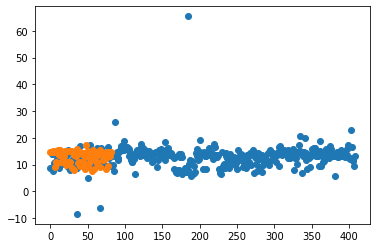

In [ ]:
plt.scatter(x=range(0,df.shape[0]),y=y )
plt.scatter(x=range(0,y_pred.shape[0]),y=y_pred)

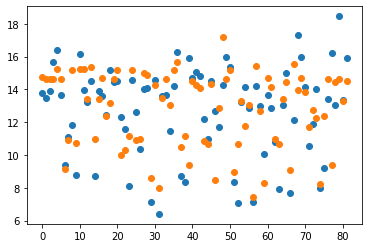

In [ ]:
plt.scatter(x= range(0,error_df.shape[0]) ,y= error_df['actual'])
plt.scatter(x=range(0,error_df.shape[0]), y= error_df['prediction'])

# For ANN one hot encoding is better. Hence, we will do one hot encoding for converting object to numerical values

only the beam_type is object here

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown ='ignore')

In [ ]:
ohe_beam_type = ohe.fit_transform(X_train[['beam_type']])
ohe_beam_type_test = ohe.transform(X_test[['beam_type']])
ohe_beam_type_train = pd.DataFrame(ohe_beam_type.toarray(), columns=['double_yran', 'double_beam', 'normal'] )
ohe_beam_type_test = pd.DataFrame(ohe_beam_type_test.toarray(), columns=['double_yran', 'double_beam', 'normal'] ) 
ohe_beam_type_train.index = X_train.index
ohe_beam_type_test.index = X_test.index

X_train= X_train.drop('beam_type', axis=1)
X_test = X_test.drop('beam_type', axis=1)

X_train = pd.concat([X_train, ohe_beam_type_train], axis=1)
X_test = pd.concat([X_test, ohe_beam_type_test], axis=1)

In [ ]:
# X_train = ohe_transfrom_train(X_train)
# X_test = ohe_transfrom_test(X_test)

In [ ]:
X_test.tail()

,warp_count,weft_count,epi,ppi,Finish_order_yds,Allowance,shrinkage,Grey_Fabric_yds,Req_Beam_length_yds,double_yran,double_beam,normal
68,40,40,110,70,18329,7.001877,9.997359,19709.0,21898.2464,0.0,0.0,1.0
20,40,40,110,90,33900,7.021393,14.529624,36460.0,42658.0552,0.0,0.0,1.0
153,30,30,110,80,1700,9.574468,15.730740,1880.0,2230.9440,0.0,0.0,1.0
14,40,40,110,90,28968,8.000127,13.571090,31487.0,36431.0968,0.0,0.0,1.0
398,40,40,110,90,1050,9.482759,16.544697,1160.0,1389.9656,0.0,0.0,1.0


For ANN scaling is a must

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

Tensorflow works better with array rather than dataframe hence we convert the dataframe to array to scales them. Besides, we will use the array form to predict from our input data..

In [ ]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Instead of Squential Model we prefer to use Functional api model**

In [ ]:
from tensorflow.python.keras import activations
input_layer = keras.Input(shape=(X_test_sc.shape[1],))
dense_layer = layers.Dense(128,kernel_initializer='normal', activation='relu')
x = dense_layer(input_layer)
x = layers.Dense(256,kernel_initializer= 'normal' ,  activation='relu')(x) 
x = layers.Dense(128,kernel_initializer= 'normal' ,activation='relu')(x)
output_layer = layers.Dense(1,kernel_initializer= 'normal', activation='linear')(x)
model = keras.Model(inputs=input_layer, outputs=output_layer, name='Ann_model')
model.summary()

Model: "Ann_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer='adam', metrics='mae')

**For early stopping**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
history= model.fit(X_train_sc, y_train,epochs=600, validation_split=0.2, batch_size=20, callbacks=[early_stop], verbose=0)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.44142542646879124

In [ ]:
loss= history.history['loss']
val_loss= history.history['val_loss']


In [ ]:
import matplotlib.pyplot as plt

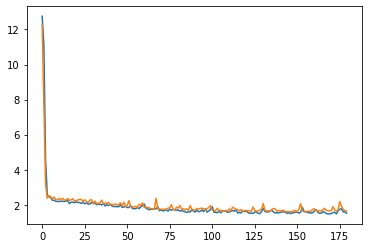

In [ ]:
plt.plot(loss)
plt.plot(val_loss)

# **For a new value:**

In [ ]:
epi = 100
ppi = 80
warp_count = 40
weft_count = 40
beam_type = 'normal'
# beam_type = ohe.transform(beam_type)
Finish_order_yds = 32000
Allowance=7
shrinkage = 12


In [ ]:
new_df = pd.DataFrame({'warp_count':[warp_count],
              'weft_count':[weft_count],
              'epi':[epi],
              'ppi':[ppi],
              'beam_type':[beam_type],
              'Finish_order_yds':[Finish_order_yds],
              'Allowance':[Allowance] ,
              'shrinkage':[shrinkage] })

new_df['Grey_Fabric_yds'] = new_df['Finish_order_yds']*100/(100-new_df['Allowance'])
new_df['Req_Beam_length_yds'] = new_df['Grey_Fabric_yds']*100/(100- new_df['shrinkage'])
# Grey_Fabric_yds = Finish_order_yds*100/(100- Allowance)
# Req_Beam_length_yds = Grey_Fabric_yds*100/(100- shrinkage)

In [ ]:
new_df

,warp_count,weft_count,epi,ppi,beam_type,Finish_order_yds,Allowance,shrinkage,Grey_Fabric_yds,Req_Beam_length_yds
0,40,40,100,80,normal,32000,7,12,34408.602151,39100.684262


In [ ]:
def ohe_transfrom_test(X_test): 
  ohe_beam_type_test = ohe.transform(X_test[['beam_type']])
  ohe_beam_type_test = pd.DataFrame(ohe_beam_type_test.toarray(), columns=['double_yran', 'double_beam', 'normal'] ) 
  ohe_beam_type_test.index = X_test.index
  X_test = X_test.drop('beam_type', axis=1)
  X_test = pd.concat([X_test, ohe_beam_type_test], axis=1)
  return X_test

In [ ]:
new_df= ohe_transfrom_test(new_df)

In [ ]:
new_df_sc = sc.transform(new_df)

In [ ]:
model.predict(new_df_sc)

array([[12.763369]], dtype=float32)